Machine Learning With Python: Linear Regression With One Variable

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\csv-files\\homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


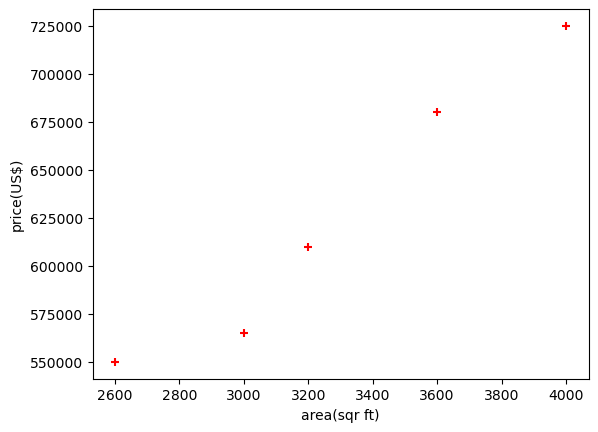

In [3]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

<AxesSubplot:xlabel='area', ylabel='price'>

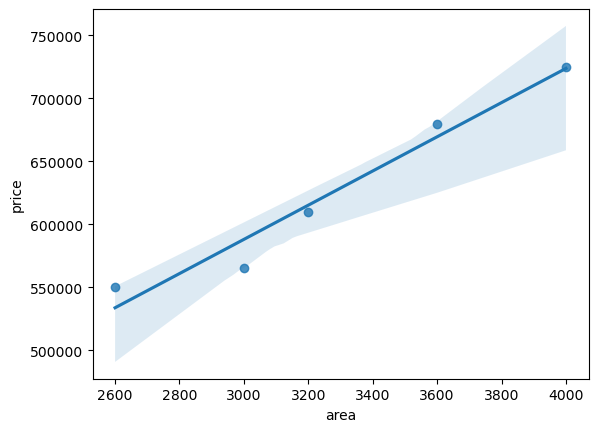

In [4]:
sns.regplot(x=df['area'],y=df['price'],data=df)

In [5]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [6]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [7]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

(1) Predict price of a home with area = 3300 sqr ft

In [8]:
reg.predict([[3200]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([615136.98630137])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

180616.43835616432

Y = m * X + b (m is coefficient and b is intercept)

In [11]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

(1) Predict price of a home with area = 5000 sqr ft

In [12]:
reg.predict([[5000]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

Generate CSV file with list of home price predictions

In [13]:
area_df = pd.read_csv("C:\\Users\\HP\\Desktop\\csv-files\\areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [14]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [15]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [16]:
from sklearn.metrics import mean_absolute_error
predicted_prices = reg.predict(area_df[['area']])
mae = mean_absolute_error(area_df['prices'], predicted_prices)
print("Mean Absolute Error:", mae)

area_df

Mean Absolute Error: 0.0


,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
from sklearn.metrics import mean_squared_error
predicted_prices = reg.predict(area_df[['area']])
mse = mean_squared_error(area_df['prices'], predicted_prices)
print("Mean Squared Error:", mse)

area_df

Mean Squared Error: 0.0


,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [18]:
from sklearn.metrics import r2_score
predicted_prices = reg.predict(area_df[['area']])
r2 = r2_score(area_df['prices'], predicted_prices)
print("R-squared Score:", r2)

R-squared Score: 1.0
